In [55]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [56]:
#covert data from excel file into pandas dataframe for better analysis

oil_price = pd.read_excel('crude_oil.xlsx')

In [57]:
oil_price.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [58]:
#extracting the month and year from the date column

oil_price['month'] = pd.DatetimeIndex(oil_price['Date']).month
oil_price['year'] = pd.DatetimeIndex(oil_price['Date']).year

In [59]:
oil_price.head()

,Date,Closing Value,month,year
0,1986-01-02,25.56,1,1986
1,1986-01-03,26.00,1,1986
2,1986-01-06,26.53,1,1986
3,1986-01-07,25.85,1,1986
4,1986-01-08,25.87,1,1986


In [60]:
#get initial description of the data, adding include='all'
oil_price.describe(include='all')

C:\Users\Ebuka\AppData\Local\Temp/ipykernel_12688/7833372.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  oil_price.describe(include='all')


,Date,Closing Value,month,year
count,8223,8216.000000,8223.000000,8223.000000
unique,8223,NaN,NaN,NaN
top,1986-01-02 00:00:00,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
first,1986-01-02 00:00:00,NaN,NaN,NaN
last,2018-07-09 00:00:00,NaN,NaN,NaN
mean,NaN,43.492139,6.485346,2001.764806
std,NaN,29.616804,3.425369,9.425618
min,NaN,10.250000,1.000000,1986.000000
25%,NaN,19.577500,4.000000,1994.000000


In [61]:
oil_price.describe()

,Closing Value,month,year
count,8216.000000,8223.000000,8223.000000
mean,43.492139,6.485346,2001.764806
std,29.616804,3.425369,9.425618
min,10.250000,1.000000,1986.000000
25%,19.577500,4.000000,1994.000000
50%,29.610000,6.000000,2002.000000
75%,63.402500,9.000000,2010.000000
max,145.310000,12.000000,2018.000000


In [62]:
#adding datetime_is_numeric=True due to warning stated in cell above when run
oil_price.describe(include='all',datetime_is_numeric=True)

,Date,Closing Value,month,year
count,8223,8216.000000,8223.000000,8223.000000
mean,2002-04-05 22:11:15.082086912,43.492139,6.485346,2001.764806
min,1986-01-02 00:00:00,10.250000,1.000000,1986.000000
25%,1994-01-25 12:00:00,19.577500,4.000000,1994.000000
50%,2002-04-02 00:00:00,29.610000,6.000000,2002.000000
75%,2010-06-12 12:00:00,63.402500,9.000000,2010.000000
max,2018-07-09 00:00:00,145.310000,12.000000,2018.000000
std,NaN,29.616804,3.425369,9.425618


### Date ranges

The data will be split into different ranges of 10 years

<ol>1986 - 1995 --> First</ol>
<ol>1996 - 2005 --> Second</ol>
<ol>2006 - 2015 --> Third</ol>
<ol>2016 - 2018 --> Fourth</ol>

In [63]:
oil_price['range'] = 0

oil_price.head()

,Date,Closing Value,month,year,range
0,1986-01-02,25.56,1,1986,0
1,1986-01-03,26.00,1,1986,0
2,1986-01-06,26.53,1,1986,0
3,1986-01-07,25.85,1,1986,0
4,1986-01-08,25.87,1,1986,0


In [64]:
#created a new column called range to differentiate time periods in the dataset
#use of .loc funtion to lov
for x in oil_price['year']:
    if x >= 1986 and x < 1996:
        oil_price['range'].loc[oil_price['year'] == x] = 'First'
    elif x >= 1996 and x < 2006:
        oil_price['range'].loc[oil_price['year'] == x]= 'Second'
    elif x >= 2006 and x < 2016:
        oil_price['range'].loc[oil_price['year'] == x] = 'Third'
    elif x >= 2016 and x < 2025:
        oil_price['range'].loc[oil_price['year'] == x]= 'Fourth'


C:\Users\Ebuka\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [65]:
oil_price.head()

,Date,Closing Value,month,year,range
0,1986-01-02,25.56,1,1986,First
1,1986-01-03,26.00,1,1986,First
2,1986-01-06,26.53,1,1986,First
3,1986-01-07,25.85,1,1986,First
4,1986-01-08,25.87,1,1986,First


In [66]:
oil_price.loc[oil_price['year'] == 2018]

,Date,Closing Value,month,year,range
8087,2018-01-01,NaN,1,2018,Fourth
8088,2018-01-02,60.37,1,2018,Fourth
8089,2018-01-03,61.63,1,2018,Fourth
8090,2018-01-04,62.01,1,2018,Fourth
8091,2018-01-05,61.44,1,2018,Fourth
...,...,...,...,...,...
8218,2018-07-03,74.19,7,2018,Fourth
8219,2018-07-04,NaN,7,2018,Fourth
8220,2018-07-05,73.05,7,2018,Fourth
8221,2018-07-06,73.78,7,2018,Fourth


In [67]:
#checking for null values within the dataset

oil_price.isnull().sum()

Date             0
Closing Value    7
month            0
year             0
range            0
dtype: int64

In [68]:
#obtaining the mean of column which has missing data

oil_price['Closing Value'].mean()

43.492138510223896

In [69]:
val = oil_price['Closing Value'].mean()

In [70]:
#replacing the null values within the column with the mean value of the column

oil_price['Closing Value'] = oil_price['Closing Value'].fillna(val)

In [71]:
oil_price.isnull().sum()

Date             0
Closing Value    0
month            0
year             0
range            0
dtype: int64

In [72]:
oil_price.groupby('year').sum()

,Closing Value,month
year,,
1986,3776.970000,1631
1987,4876.930000,1669
1988,4103.110000,1679
1989,5046.320000,1676
1990,6303.330000,1674
1991,5514.590000,1670
1992,5287.920000,1675
1993,4608.050000,1642
1994,4333.500000,1640


In [73]:
year_sub = oil_price.groupby('year')['Closing Value'].agg(['sum', 'mean', 'min', 'max']).reset_index()

In [74]:
year_sub.head()

,year,sum,mean,min,max
0,1986,3776.97,15.047689,10.25,26.53
1,1987,4876.93,19.200512,15.12,22.44
2,1988,4103.11,15.965409,12.58,18.54
3,1989,5046.32,19.635486,16.99,24.62
4,1990,6303.33,24.526576,15.43,41.07


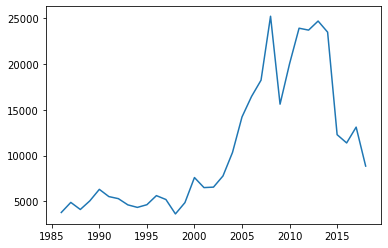

In [75]:
import matplotlib.pyplot as mpl

x = year_sub['year']
y = year_sub['sum']
mpl.plot(x,y)
mpl.show()

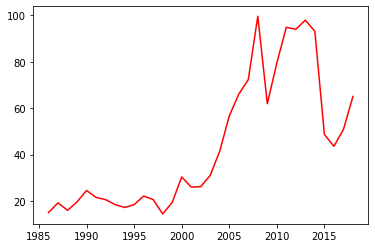

In [76]:
x = year_sub['year']
y = year_sub['sum']
z = year_sub['mean']
#mpl.plot(x,y)
mpl.plot(x,z,'r')
mpl.show()

### Plotting two graphs on one axes

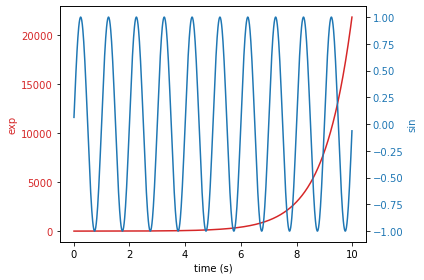

In [77]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = mpl.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
mpl.show()

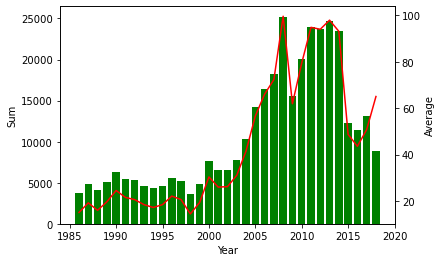

In [78]:
x = year_sub['year']
y = year_sub['sum']
z = year_sub['mean']

fig, ax1 = mpl.subplots()

colour = 'green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Sum')
ax1.bar(x,y,color=colour)

ax2 = ax1.twinx()
ax2.set_ylabel('Average')
ax2.plot(x,z,'r')

#fig.tight_layout()
mpl.show()

In [90]:
oil_price['range'] = oil_price['range'].astype("category")

In [122]:
range_sub = oil_price.groupby('range')['Closing Value'].agg(['sum', 'mean', 'min', 'max']).reset_index()
month_sub = oil_price.groupby('month')['Closing Value'].agg(['sum', 'mean', 'min', 'max']).reset_index()

In [123]:
order = ["First", "Second", "Third", "Fourth"]
range_sub["range"].cat.set_categories(order, inplace=True)
range_sub["range"]

C:\Users\Ebuka\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


0     First
1    Fourth
2    Second
3     Third
Name: range, dtype: category
Categories (4, object): ['First', 'Second', 'Third', 'Fourth']

In [124]:
range_sub

,range,sum,mean,min,max
0,First,48476.35000,19.070161,10.25,41.07
1,Fourth,33323.26497,50.875214,26.21,77.41
2,Second,72243.49000,28.805219,10.82,69.91
3,Third,203592.75000,80.854944,30.28,145.31


In [133]:
range_sub=range_sub.sort_values("range").reset_index().drop("index",axis=1)

In [134]:
range_sub

,range,sum,mean,min,max
0,First,48476.35000,19.070161,10.25,41.07
1,Second,72243.49000,28.805219,10.82,69.91
2,Third,203592.75000,80.854944,30.28,145.31
3,Fourth,33323.26497,50.875214,26.21,77.41


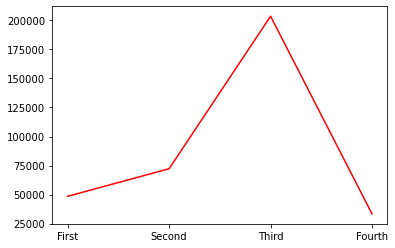

In [135]:
x = range_sub['range']
y = range_sub['sum']
z = range_sub['mean']
#mpl.plot(x,y)
mpl.plot(x,y,'r')
mpl.show()

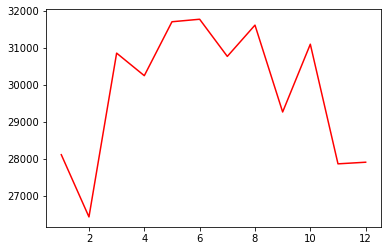

In [136]:
x = month_sub['month']
y = month_sub['sum']
z = month_sub['mean']
#mpl.plot(x,y)
mpl.plot(x,y,'r')
mpl.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(oil_price["Closing Value"],Y_predict_simple_fit)

In [ ]:
r_test = []

order=[1,2,3,4]

for n in order:
    pr = Pol